In [2]:
from importlib import reload
import cpclasses
reload(cpclasses)
from cpclasses import *
import torch



[Text(0.5, 0, '$x_1$'), Text(0, 0.5, '$x_2$')]

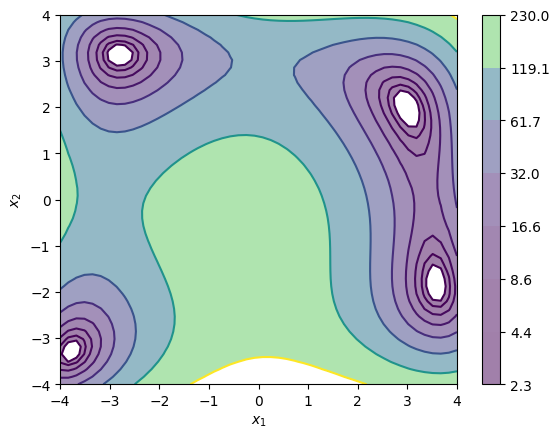

In [23]:
vals = np.linspace(-4, 4)
x1d, x2d = np.meshgrid(vals,vals)


def f(x1, x2):
    return (x1**2 + x2 - 11)**2 + (x1 + x2**2 - 7)**2

yd = f(x1d, x2d)

fig, ax = plt.subplots()
levels = np.logspace(0, 2, 8) * 2.3
ax.contour(x1d, x2d, yd, levels=levels)
color_map = ax.contourf(x1d, x2d, yd, levels=levels, alpha=0.5)
fig.colorbar(color_map, ax=ax)
ax.set(xlabel='$x_1$', ylabel='$x_2$')

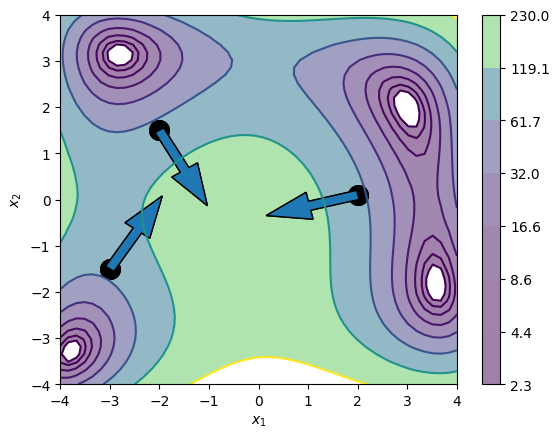

In [27]:
for P0 in [[-2,1.5],[2,.1],[-3,-1.5]]:
    P0 = torch.tensor(P0,requires_grad=True)
    y = f(*P0)
    y.backward()
    grad_of_y = np.array([P0.grad[0],P0.grad[1]])
    P0 = P0.detach()
    v = grad_of_y/np.linalg.norm(grad_of_y)
    ax.scatter(*P0,s=200,c='k')
    ax.arrow(*P0,*v,width=0.2)
fig